TASK-2

---



---



Problem Statement:

Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving Titanic classifier.png to Titanic classifier (2).png


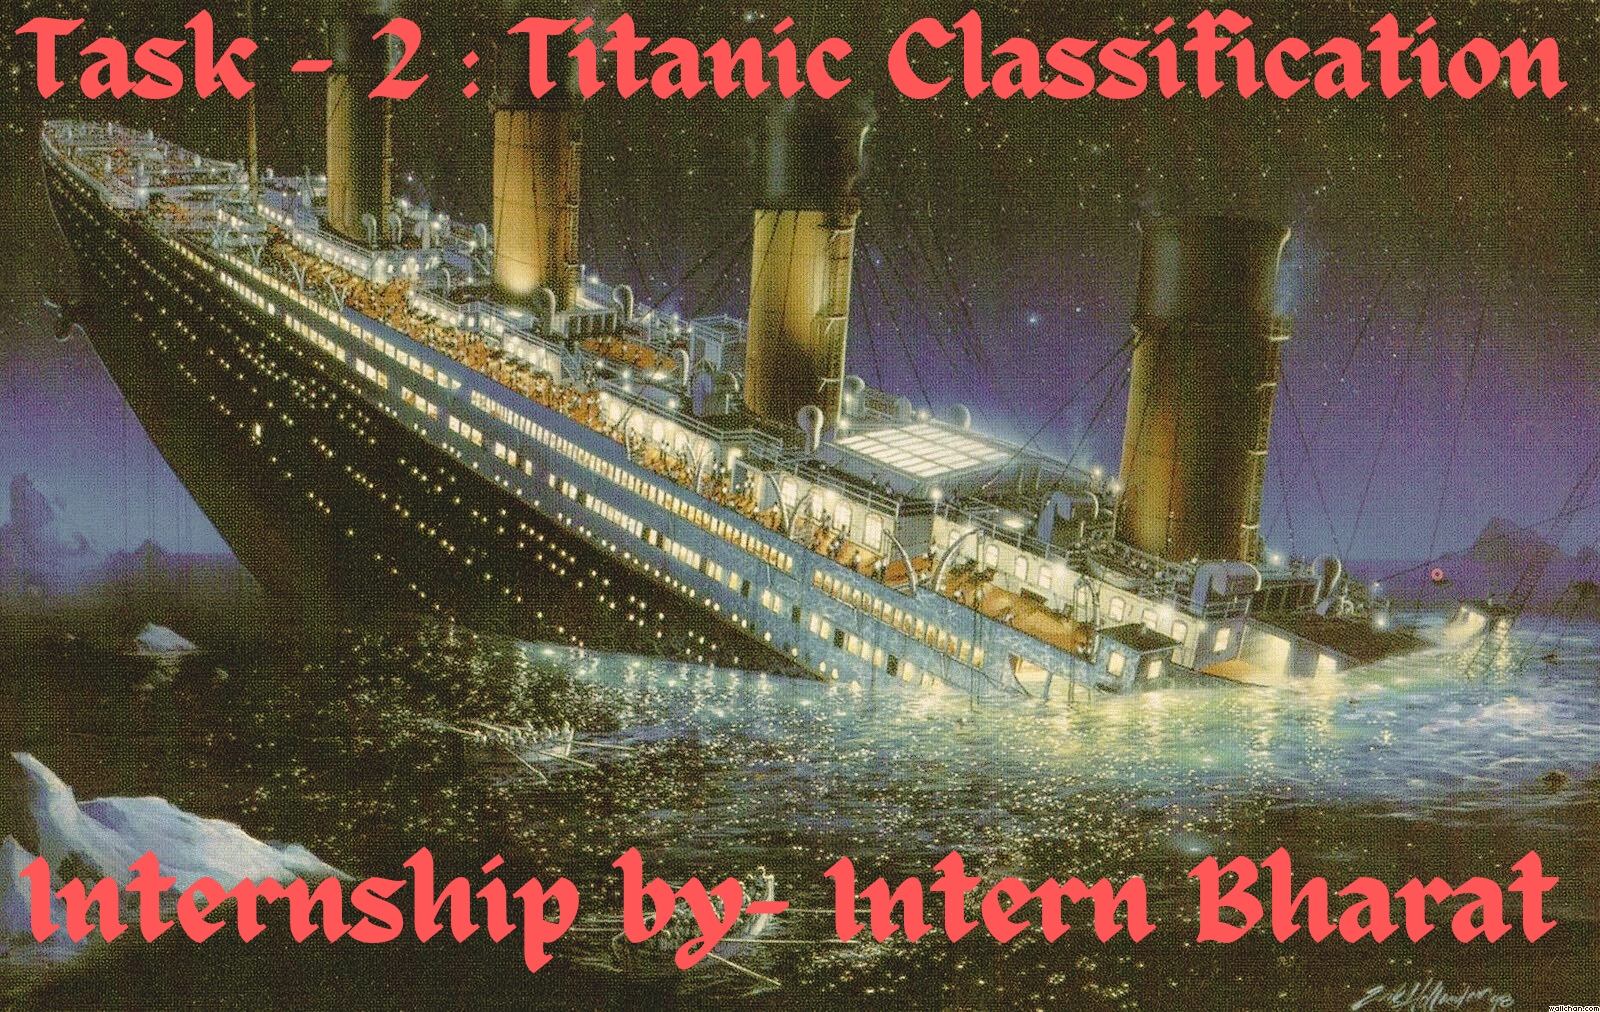

In [ ]:
Image('Titanic classifier.png')

Step 1: Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Step 2: Loading the Dataset

In [ ]:
tng_df = pd.read_csv('/content/titanic.csv')

In [ ]:
tng_df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

Step 3: EDA( Exploratory Data Analysis)

* Understanding your variables.
* Cleaning your dataset.
* Analyzing relationships between variables.

In [ ]:
# To check the Dimension
tng_df.shape

(418, 12)

In [ ]:
tng_df.size

5016

In [ ]:
# to find the missing values
# counting
tng_df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [ ]:
tng_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

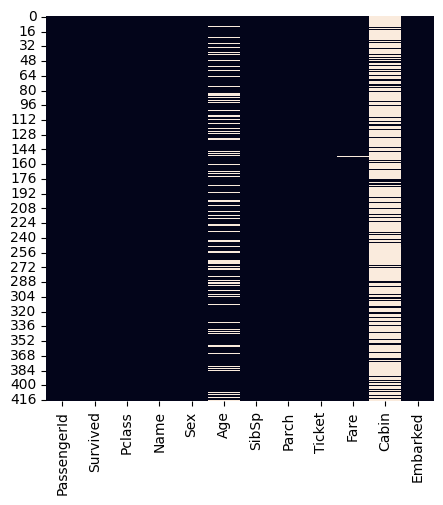

In [ ]:
#visualize the missing data
plt.figure(figsize = (5,5))
sns.heatmap(tng_df.isnull(), cbar=False)
plt.show()

In [ ]:
tng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#handling the missing data
numerical_columns = tng_df.select_dtypes(include=['int64', 'float64']).columns
tng_df[numerical_columns] = tng_df[numerical_columns].fillna(tng_df[numerical_columns].mean())

In [ ]:
categorical_columns = tng_df.select_dtypes(include='object').columns
tng_df[categorical_columns] = tng_df[categorical_columns].fillna('Unknown')

In [ ]:
tng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
tng_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
tng_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Factors that might influence a person's likelihood of survival in the context of the Titanic sinking for this case is Pclass(Passenger Class), sex, age,SibSp (Number of Siblings/Spouses),Parch (Number of Parents/Children),

In [ ]:
# so drop the unwanted columns
tng_df.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis = 1, inplace = True)


In [ ]:
tng_df.drop(['Embarked'],axis =1,inplace = True)

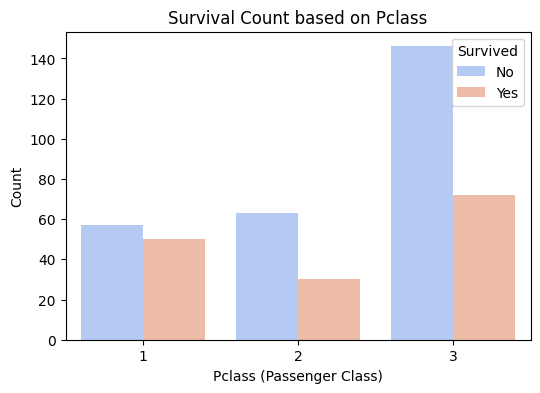

In [ ]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=tng_df, palette='coolwarm')
plt.title('Survival Count based on Pclass')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

So, from here we can define 1st class passengers survived more as compared 2nd and 3rd class to

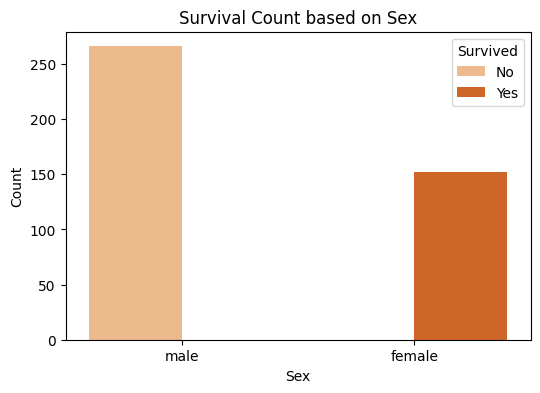

In [ ]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=tng_df, palette='Oranges')
plt.title('Survival Count based on Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

Female survival is more compared to male.

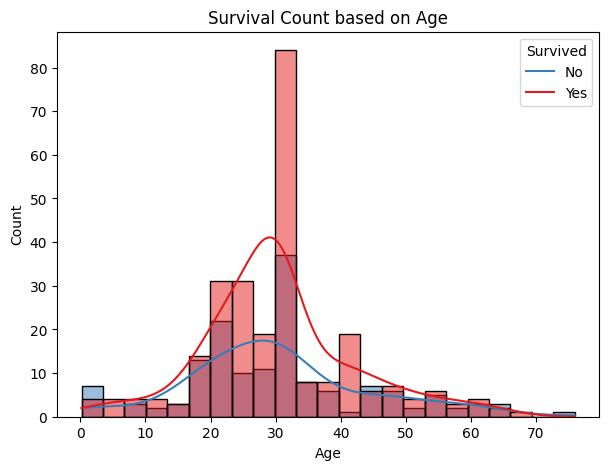

In [ ]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=tng_df, kde=True, palette='Set1')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

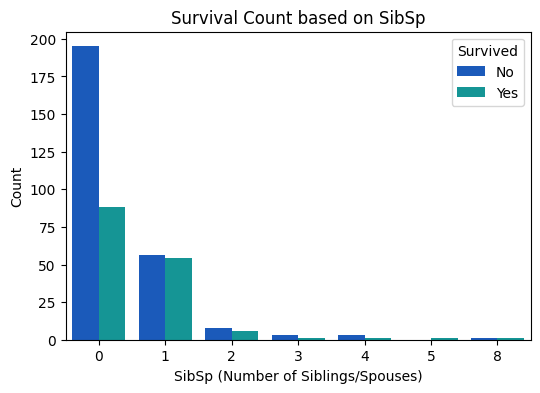

In [ ]:
# Visualizing survival based on socio-economic status (siblings/spouses aboard (SibSp))
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=tng_df, palette='winter')
plt.title('Survival Count based on SibSp')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

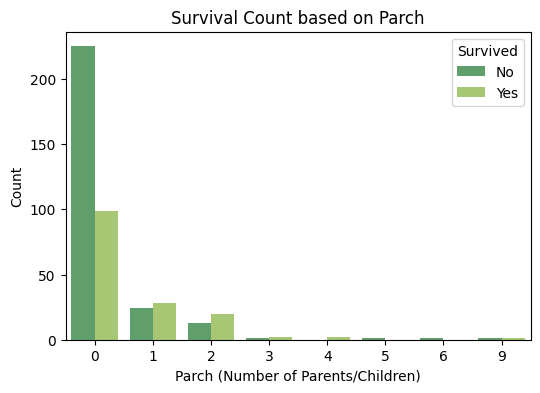

In [ ]:
# Visualizing survival based on socio-economic status (number of parents/children aboard (Parch))
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=tng_df, palette='summer')
plt.title('Survival Count based on Parch')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [ ]:
tng_df. head().T

0       1     2     3       4
Survived     0       1     0     0       1
Pclass       3       3     2     3       3
Sex       male  female  male  male  female
Age       34.5    47.0  62.0  27.0    22.0
SibSp        0       1     0     0       1
Parch        0       0     0     0       1

Step 4:Pre-processing

In [ ]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
tng_df['Sex'] = label_encoder.fit_transform(tng_df['Sex'])

In [ ]:
# Separate features and target variable
X = tng_df.drop('Survived', axis=1)
Y = (tng_df['Survived'])

Step 5: Building a Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

1. Splitting the train and Test Data

In [ ]:
# Split the training data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

USING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

STEP 6: EVALUATION MATRIX

In [ ]:
print (confusion_matrix(Y_test,pred))
print('******'*20)
print(classification_report(Y_test, pred))
print('******'*20)
print(accuracy_score(Y_test,pred))



[[47  0]
 [ 0 37]]
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        37

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

************************************************************************************************************************
1.0


USING RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
pred1 = rf.predict(X_test)
pred1

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

EVALUATION MATIX FOR USING RANDOM FOREST CLASSIFIER

In [ ]:
print (confusion_matrix(Y_test,pred1))
print('******'*20)
print(classification_report(Y_test, pred1))
print('******'*20)
print(accuracy_score(Y_test,pred1))

[[47  0]
 [ 0 37]]
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        37

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

************************************************************************************************************************
1.0


USING XG BOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
pred2 = xgb.predict(X_test)
pred2


array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

EVALUATION MATRIX FOR USING XG BOOST CLASSIFIER

In [ ]:
print (confusion_matrix(Y_test,pred2))
print('******'*20)
print(classification_report(Y_test, pred2))
print('******'*20)
print(accuracy_score(Y_test,pred2))

[[47  0]
 [ 0 37]]
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        37

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

************************************************************************************************************************
1.0
